# Отчет  
В ходе выполнения тестового задания требовалось реализовать следующие задачи:  
1. Написать на языке С++ класс, выполняющий функции модулятора QAM-(4, 16, 64)  
2. Написать на языке С++ класс, выполняющий добавление АБГШ к модулированным символам   
3. Написать на языке С++ класс, выполняющий функции демодулятора QAM-(4, 16, 64)  
4. Написать последовательный вызов 1-3 для случайной последовательности бит для разных значений дисперсий шума   
5. Построить график BER  

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
from commpy.modulation import QAMModem
from commpy.utilities import bitarray2dec

## Задания 1-3  
В ходе выполнения заданий 1-3 были реализованы классы модулятора, канала и демодулятора. На С++ получены значения рандомно сгенерированных битов последовательности, комплексные значения после модуляции, после прохода через канал, а также последовательность бит после демодуляции. Все значения записаны в соответствующие текстовые файлы.  
Реализована поддержка QAM-4, 16 и 64 (квадратных созвездий), но для примера продемонстрирован случай с QAM-4.

In [23]:
def plot_const(filename):

    
    with open(filename, 'r') as file:
        lines = file.readlines()
    

    complex_numbers = []
    for line in lines:
        
        line = line.strip().replace('(', '').replace(')', '').replace('i', '')
        parts = line.split(',')
        if len(parts) == 2:
            real = float(parts[0])
            imag = float(parts[1])
            complex_numbers.append(complex(real, imag))
    
   
    complex_array = np.array(complex_numbers)
    
  
    plt.figure(figsize=(5, 5))
    plt.scatter(complex_array.real, complex_array.imag, color='blue', alpha=0.6)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title(f'Созвездие {filename}')
    plt.xlabel('In-Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.axis('equal')
    
    plt.show()
    return complex_array

def readfile(filename):

    with open(filename, 'r') as file:
        lines = file.readlines()
    
    numbers = []
    for line in lines:
        parts = line.split(',')
        if len(parts) == 2:
            real = float(parts[0])
            imag = float(parts[1])
            numbers.append(complex(real, imag))
    

    complex_array = np.array(numbers)
    return complex_array

def simulate_ber_qam(qam_order, snr_db_range):
    qam = QAMModem(qam_order)
    bits_per_symbol = int(np.log2(qam_order))
    num_symbols = 100000
    num_bits = num_symbols * bits_per_symbol
    bits = np.random.randint(0, 2, num_bits)
    symbols = qam.modulate(bits)
    signal_power = np.mean(np.abs(symbols) ** 2)
    
    ber = []
    for snr_db in snr_db_range:
        snr_linear = 10 ** (snr_db / 10)
        noise_power = signal_power / snr_linear
        noise = np.sqrt(noise_power / 2) * (np.random.randn(len(symbols)) + 1j * np.random.randn(len(symbols)))
        noisy_symbols = symbols + noise
        demod_bits = qam.demodulate(noisy_symbols, demod_type='hard')
        bit_errors = np.sum(bits != demod_bits)
        ber.append(bit_errors / num_bits)
    
    return ber


Выведены сигнальное созвездие модуляции, сигнальное созвездие модулированных данных, сигнальное созвездие зашумленных данных.  
Выведены последовательность исходных данных, модулированная последовательность, принятая зашумленная последовательность, демодулированная последовательность.  
Исходная и демодулированная последовательности совпадают.  

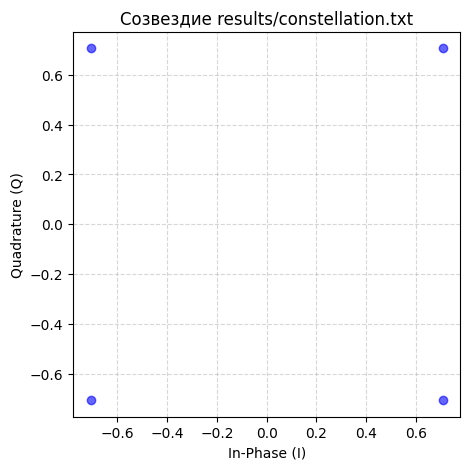

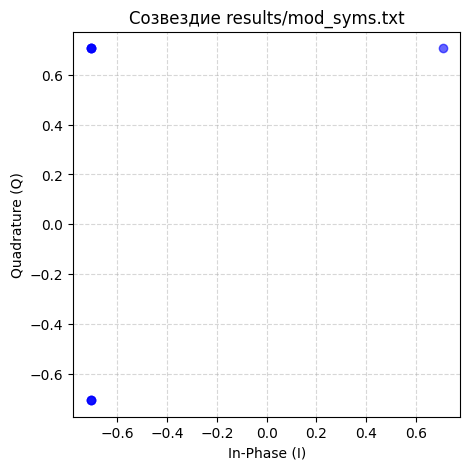

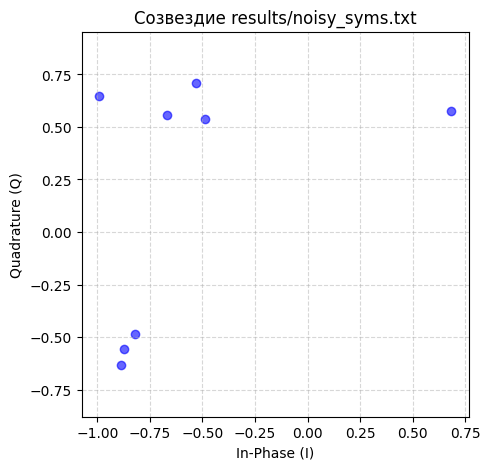

Битовая последовательность: [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]
Модулированная последовательность: [-0.707107+0.707107j -0.707107+0.707107j  0.707107+0.707107j
 -0.707107+0.707107j -0.707107-0.707107j -0.707107-0.707107j
 -0.707107-0.707107j -0.707107+0.707107j]
Принятая последовательность: [-0.486285+0.535894j -0.991994+0.648291j  0.685021+0.57672j
 -0.670743+0.558369j -0.885968-0.63472j  -0.874201-0.555539j
 -0.820303-0.487058j -0.533083+0.708686j]
Битовая последовательность: [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.]


In [24]:
bits = np.loadtxt('results/bits.txt', delimiter=',')
const_data = plot_const("results/constellation.txt")

mod_data = plot_const("results/mod_syms.txt")

noisy_data = plot_const("results/noisy_syms.txt")

bits_rx = np.loadtxt('results/rx_bits.txt', delimiter=',')


print("Битовая последовательность:", bits)
print("Модулированная последовательность:", mod_data)
print("Принятая последовательность:", noisy_data)
print("Битовая последовательность:", bits_rx)

## Задание 4. Зависимость от дисперсии шума
Программа вычисляет количество неверно принятых бит для значений дисперсии шума от 0.1 до 0.9 с шагом 0.1. Результаты выводятся в консоль.

## Задание 5. Графики BER для QAM-4, 16, 64 
Было принято решение построить графики вероятности битовой ошибки не от дисперсии шума, а от SNR, поскольку такое представление является более привычным. Однако, разработанный класс поддерживает и требуемую реализацию.  
Графики BER, полученные с помощью разработанных классов на С++ были сравнены с результатами встроенной функции Python.  

### BER для QAM-4

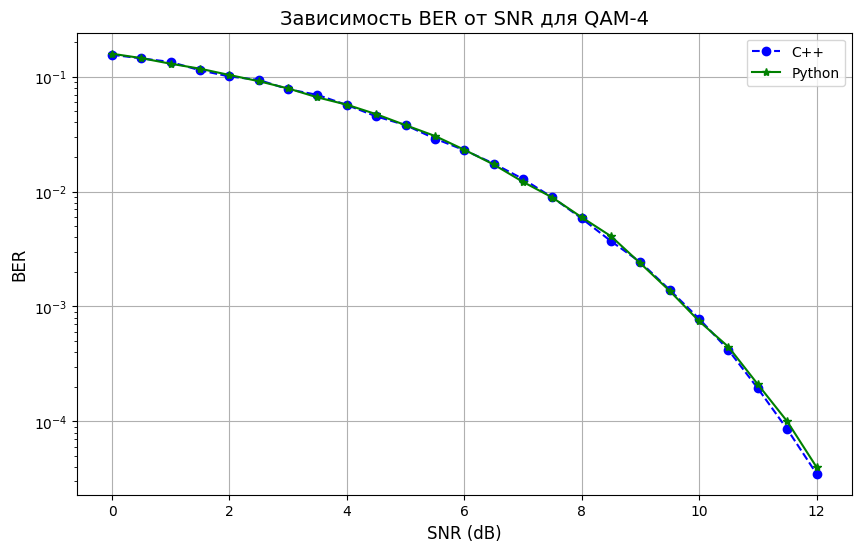

In [25]:
snr_values = np.loadtxt('results/snr_values_4.txt')
ber_values = np.loadtxt('results/ber_values_4.txt')

snr_db_range = np.arange(0, 12.5, 0.5)
ber_qam4 = simulate_ber_qam(4, snr_db_range)

plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, ber_values, 'b--o', label='C++')
plt.semilogy(snr_values, ber_qam4, 'g-*', label='Python')
plt.title('Зависимость BER от SNR для QAM-4', fontsize=14)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('BER', fontsize=12)
plt.grid()
plt.legend()
  

### BER для QAM-16

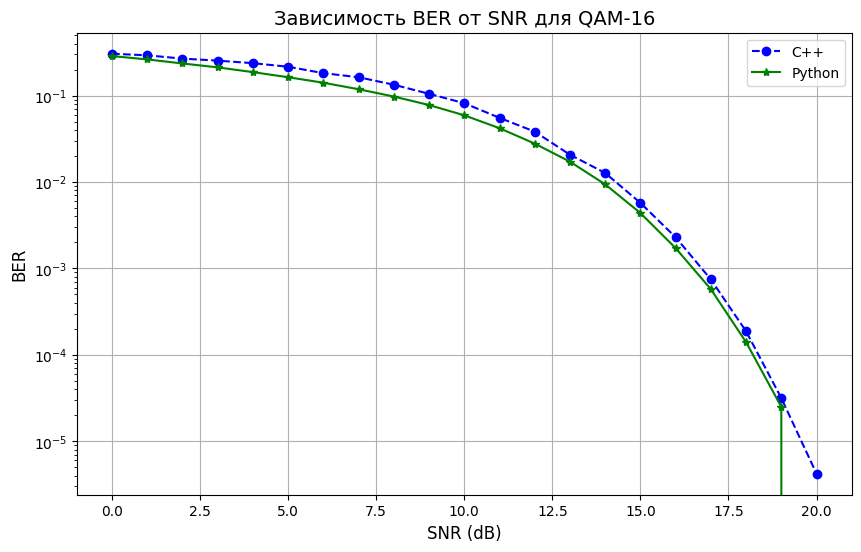

In [26]:
snr_values = np.loadtxt('results/snr_values_16.txt')
ber_values = np.loadtxt('results/ber_values_16.txt')

snr_db_range = np.arange(0, 21, 1)
ber_qam16 = simulate_ber_qam(16, snr_db_range)

plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, ber_values, 'b--o', label='C++')
plt.semilogy(snr_values, ber_qam16, 'g-*', label='Python')
plt.title('Зависимость BER от SNR для QAM-16', fontsize=14)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('BER', fontsize=12)
plt.grid()
plt.legend()

### BER для QAM-64

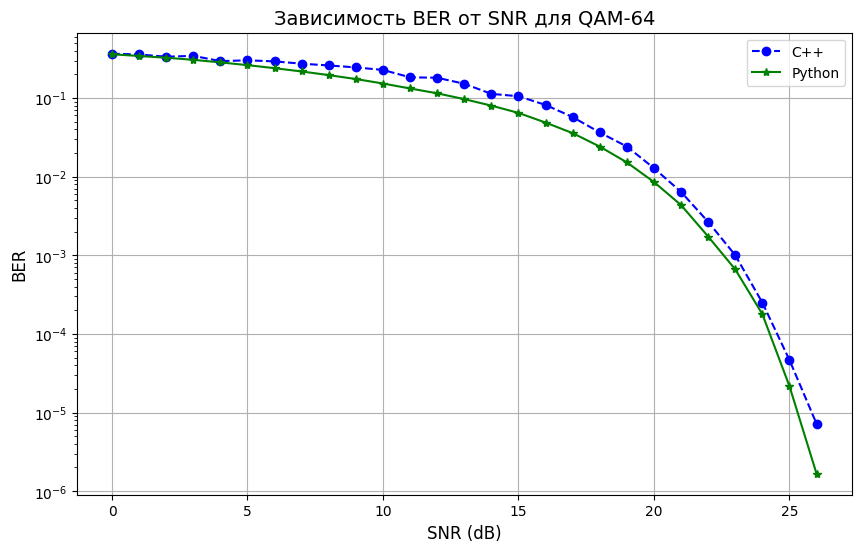

In [27]:
snr_values = np.loadtxt('results/snr_values_64.txt')
ber_values = np.loadtxt('results/ber_values_64.txt')

snr_db_range = np.arange(0, 27, 1)
ber_qam64 = simulate_ber_qam(64, snr_db_range)

plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, ber_values, 'b--o', label='C++')
plt.semilogy(snr_values, ber_qam64, 'g-*', label='Python')
plt.title('Зависимость BER от SNR для QAM-64', fontsize=14)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('BER', fontsize=12)
plt.grid()
plt.legend()

### Выводы 
QAM-4 (QPSK) имеет наименьший BER при низких SNR.  
QAM-16 и QAM-64 требуют большего SNR для той же вероятности ошибки.  
Полученный на С++ график имеет результаты несколько хуже, чем для Python, что связано с отсутствием реализации кода Грея в С++ варианте.